In [1]:
import pandas as pd

dataset = pd.read_csv('allUsers.lcl.csv')
dataset = dataset.drop(0)
print(dataset.head())

   Class  User         X0         Y0         Z0         X1         Y1  \
1      1     0  54.263880  71.466776 -64.807709  76.895635  42.462500   
2      1     0  56.527558  72.266609 -61.935252  39.135978  82.538530   
3      1     0  55.849928  72.469064 -62.562788  37.988804  82.631347   
4      1     0  55.329647  71.707275 -63.688956  36.561863  81.868749   
5      1     0  55.142401  71.435607 -64.177303  36.175818  81.556874   

          Z1         X2         Y2 ...  Z8 X9 Y9 Z9 X10 Y10 Z10 X11 Y11 Z11  
1 -72.780545  36.621229  81.680557 ...   ?  ?  ?  ?   ?   ?   ?   ?   ?   ?  
2 -49.596509  79.223743  43.254091 ...   ?  ?  ?  ?   ?   ?   ?   ?   ?   ?  
3 -50.606259  78.451526  43.567403 ...   ?  ?  ?  ?   ?   ?   ?   ?   ?   ?  
4 -52.752784  86.320630  68.214645 ...   ?  ?  ?  ?   ?   ?   ?   ?   ?   ?  
5 -53.475747  76.986143  42.426849 ...   ?  ?  ?  ?   ?   ?   ?   ?   ?   ?  

[5 rows x 38 columns]


## Build Skeleton approach

In [2]:
parents = {}
keys = ['X', 'Y', 'Z']

for k in keys:
    for i in range(1, 12):
        parents[str(k) + str(i)] = str(k) + str(i-1)

In [3]:
print(parents)

{'X1': 'X0', 'X2': 'X1', 'X3': 'X2', 'X4': 'X3', 'X5': 'X4', 'X6': 'X5', 'X7': 'X6', 'X8': 'X7', 'X9': 'X8', 'X10': 'X9', 'X11': 'X10', 'Y1': 'Y0', 'Y2': 'Y1', 'Y3': 'Y2', 'Y4': 'Y3', 'Y5': 'Y4', 'Y6': 'Y5', 'Y7': 'Y6', 'Y8': 'Y7', 'Y9': 'Y8', 'Y10': 'Y9', 'Y11': 'Y10', 'Z1': 'Z0', 'Z2': 'Z1', 'Z3': 'Z2', 'Z4': 'Z3', 'Z5': 'Z4', 'Z6': 'Z5', 'Z7': 'Z6', 'Z8': 'Z7', 'Z9': 'Z8', 'Z10': 'Z9', 'Z11': 'Z10'}


In [18]:
linhas, cols = dataset.shape
colnames = dataset.columns
new_dataset = dataset
print(linhas, cols)
print('Started')
for linha in range(0, linhas):
    for col in range(2, cols):
        if(new_dataset.iloc[linha, col] == '?'):
            new_dataset.at[linha+1, colnames[col]] = new_dataset.loc[linha+1, parents[colnames[col-3]]]
            
print(linha, col)
print('Finished')

78095 38
Started
78094 37
Finished


In [19]:
print(new_dataset.tail())

       Class  User         X0          Y0         Z0         X1          Y1  \
78091      5    14  54.251127  129.177414 -44.252511  27.720784  107.810661   
78092      5    14  54.334883  129.253842 -44.016320  27.767911  107.914808   
78093      5    14  54.151540  129.269502 -44.173273  27.725978  108.034006   
78094      5    14  27.915311  108.007390  10.814957  -0.910435  122.464093   
78095      5    14  27.898705  108.092877  11.107857 -30.031402   77.740235   

              Z1         X2          Y2        ...                         Z8  \
78091  11.099282  -1.270139  122.758679        ...          -6.54311453354464   
78092  11.069842 -30.334054   77.858214        ...          -62.1305625712145   
78093  11.020347 -22.574718  104.222208        ...           3.83590370588782   
78094 -47.271248 -30.084588   77.705861        ...          -63.2216259324485   
78095 -17.453099  -1.091566  122.827638        ...          -63.0265744155222   

                      X9              

## Plot data

1005


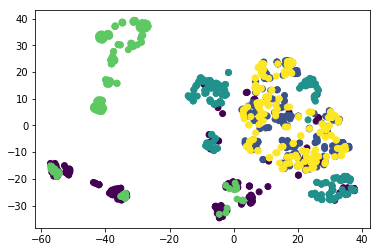

In [27]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from sklearn.manifold import TSNE

dados = new_dataset.sort_values('Class')

dados_print = []
classes = []
atual = 1
cont = 0
shape = dados.shape
AMOSTRA = 200
for i in range(1, shape[0]):
    if cont <= AMOSTRA and atual == dados.loc[i, 'Class']:
        dados_print.append(dados.iloc[i, :])
        classes.append(dados.loc[i, 'Class'])
        cont+=1
    elif cont > AMOSTRA:
        cont = 0
        atual += 1 % 6
print(len(dados_print))
model = TSNE(learning_rate=200)
tsne_features = model.fit_transform(dados_print)
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys, c=np.array(classes))
plt.show()


In [ ]:
X = new_dataset.iloc[:, 1:]
y = new_dataset.iloc[:, 0]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)


In [ ]:
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))